In [ ]:
#Importing packages
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt

In [ ]:
#Upload data to workspace
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#Insert data to dataframe
df = pd.read_csv("data.csv",index_col=0)

In [ ]:
#Data Splitting
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

#Split data for training and testing the model
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state = 20)

#Training the model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train,y_train)

#Predict using the model
prediction = svm_model.predict(X_test)

In [ ]:
#Accuracy score of the model
print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, prediction)*100}")

Accuracy on train data by SVM Classifier: 68.56571428571428
Accuracy on test data by SVM Classifier: 68.81333333333333


In [ ]:
#F1 score
f1 = f1_score(y_test,prediction)
print("F1 Score: " + format(f1))

F1 Score: 0.7889179676924464


In [ ]:
#Recall score
recall = recall_score(y_test,prediction)
print("Recall score: " + format(recall))

Recall score: 0.9059067357512953


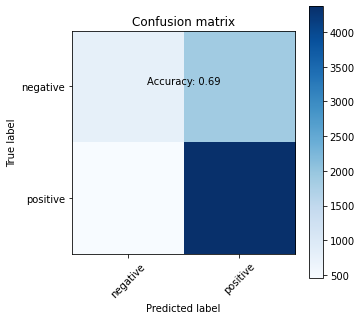

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['negative', 'positive'], rotation=45)
plt.yticks(tick_marks, ['negative', 'positive'])

# Calculate the accuracy of the model
accuracy = np.sum(prediction == y_test) / len(y_test)

# Add the accuracy to the plot
plt.text(0.5, 0, f'Accuracy: {accuracy:.2f}', ha='center', va='bottom')

#Show the confusion matrix
plt.show()